In [2]:
import os

import torch
import torchvision
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer
import cv2
import matplotlib.pyplot as plt

NOTE: Redirects are currently not supported in Windows or MacOs.


(160, 144, 3)


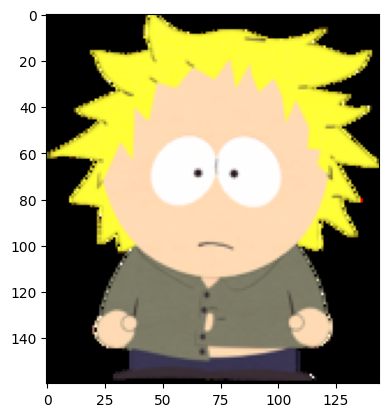

In [12]:
image = cv2.cvtColor(cv2.imread("single_character_data/Tweek_Tweak/Current Appearance.png"), cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

In [ ]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [6]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
)

In [7]:
trainer = Trainer(
    diffusion,
    'single_character_data',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 700000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True                        # turn on mixed precision
)

trainer.train()

/Users/user/PycharmProjects/south-park-diffusion/venv/lib/python3.8/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


  0%|          | 0/700000 [00:00<?, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[32, 4, 128, 128] to have 3 channels, but got 4 channels instead